In [1]:
import sys
sys.path.append("..")

from dataset import clean_data, get_conll_dataset, conlldf2text, conlltext2df
from file import read_df
from fine_tune.constants import * 

/mnt/data/src/ner/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/data/src/ner/.venv/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Analyse train data

In [ ]:
raw_data = read_df("/mnt/data/data/Data_Ner/Data_Ner.xlsx")
raw_data.head()

/mnt/data/src/ner/.venvaug/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/mnt/data/src/ner/.venvaug/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


,id,title,label
0,91227.jpg,TIỆM TÓC Ngọc Bích CẮT - UỐN - DUỖI - NHUỘM CẠ...,K K N N K K K K K K K K K K K K K K K K K K K ...
1,94739.jpg,CẮT TÓC NAM - NỮ Linh CẮT DUỖI NHUỘM UỐN KỸ TH...,K K K K K N K K K K K K K K K K K K K A A A A ...
2,91831.jpg,Tiệm Tóc MỸ LINH UỐN DUỖI NHUỘM LÀM MÓNG GEL N...,K K N N K K K K K K K K K K K K O O O O O
3,94567.jpg,"Hair Salon Thủy * CẮT, UỐN, GỘI * DUỖI, NHUỘM,...",K K N K K K K K K K K K K K K
4,94207.jpg,Q QUEEN JAPAN COSMETICS - Tuyển CTV Mỹ phẩm ch...,N N K K K K K K K K K K K K K K K K K K K K K ...


In [3]:
cleaned_df = clean_data(raw_data)
cleaned_df.head()

,tokens,ner_tags
0,"[TIEM, TOC, Ngoc, Bich, CAT, UON, DUOI, NHUOM,...","[B-K, I-K, B-N, I-N, B-K, I-K, I-K, I-K, I-K, ..."
1,"[CAT, TOC, NAM, NU, Linh, CAT, DUOI, NHUOM, UO...","[B-K, I-K, I-K, I-K, B-N, B-K, I-K, I-K, I-K, ..."
2,"[Tiem, Toc, MY, LINH, UON, DUOI, NHUOM, LAM, M...","[B-K, I-K, B-N, I-N, B-K, I-K, I-K, I-K, I-K, ..."
3,"[Hair, Salon, Thuy, CAT, UON, GOI, DUOI, NHUOM...","[B-K, I-K, B-N, B-K, I-K, I-K, I-K, I-K, I-K, ..."
4,"[Q, QUEEN, JAPAN, COSMETICS, Tuyen, CTV, My, p...","[B-N, I-N, B-K, I-K, I-K, I-K, I-K, I-K, I-K, ..."


In [5]:
def get_plot_data(conll_text_files):
    data = []

    for text_file in conll_text_files:
        with open(text_file, "r") as f:
            text = f.read()
        
        df = conlltext2df(text)
        ner_tags = np.concatenate(df["ner_tags"].apply(np.array).to_numpy())
        values, counts = np.unique(ner_tags, return_counts=True)
        index_array = np.argsort(values)
        data.append({
            "x": counts[index_array],
            "labels": values[index_array],
        })

    return data

In [13]:
def plot_pie_charts(data,titles=None, suptitle=""):
    plt.figure(figsize=(10, 10), layout="constrained")
    ncols = 3
    nrows = (len(data) // ncols) + (len(data) % ncols)

    for i, _data in enumerate(data):
        ax = plt.subplot(nrows, ncols, i+1)
        ax.pie(_data["x"], labels=_data["labels"], autopct="%.1f%%")

        if titles:
            ax.set_title(titles[i])

    if suptitle:
        plt.suptitle(suptitle)
    plt.show()

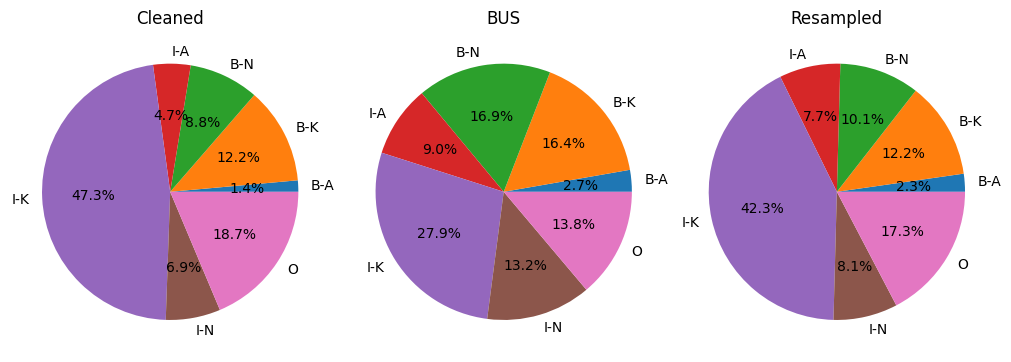

In [14]:
conll_text_files = [
    "../data/Data_Ner.txt",
    "../data/Data_Ner_BUS.txt",
    "../data/Data_Ner_resampled.txt",
]

data = get_plot_data(conll_text_files)
plot_pie_charts(data, titles=["Cleaned", "BUS", "Resampled"])

## Analyse test dataset

In [3]:
test_excel = "/mnt/data/data/Data_Ner/Data_Ner_Test_1911.xlsx"
test_df = read_df(test_excel) 
test_cleaned_data = clean_data(test_df, label2id=LABEL2ID)
test_dataset = get_conll_dataset(test_cleaned_data, labels=LABELS)
test_dataset

Dataset({
    features: ['tokens', 'ner_tags'],
    num_rows: 7155
})

In [4]:
test_df = test_dataset.to_pandas()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7155 entries, 0 to 7154
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tokens    7155 non-null   object
 1   ner_tags  7155 non-null   object
dtypes: object(2)
memory usage: 111.9+ KB


In [5]:
test_df.head()

,tokens,ner_tags
0,"[quan, com, ga, xoi, mo, so, 19]","[3, 4, 4, 4, 4, 4, 4]"
1,"[ti, ni, bun, bo, mien, ga, bun, mang, goi, ga...","[3, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2]"
2,"[trang, cat, toc, thuy]","[3, 1, 2, 3]"
3,"[nasa, nails, eyelash, 0788865586, vo, thi, tu...","[3, 1, 2, 0, 0, 0, 0, 0]"
4,"[guu, coffee]","[3, 4]"


In [6]:
test_df["token_lens"] = test_df["tokens"].apply(lambda x: len(x))
test_df["ner_tag_lens"] = test_df["ner_tags"].apply(lambda x: len(x))

test_df.describe()

,token_lens,ner_tag_lens
count,7155.000000,7155.000000
mean,8.872257,8.872257
std,7.744679,7.744679
min,1.000000,1.000000
25%,3.000000,3.000000
50%,7.000000,7.000000
75%,12.000000,12.000000
max,108.000000,108.000000


<Axes: xlabel='token_lens', ylabel='Count'>

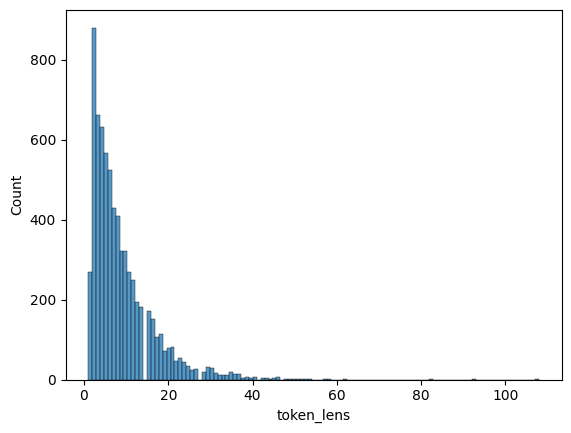

In [7]:
sns.histplot(data=test_df, x="token_lens")

In [8]:
test_df[test_df["token_lens"] > 40]

,tokens,ner_tags,token_lens,ner_tag_lens
40,"[tu, nail, chuyen, son, gel, dap, bot, dap, ge...","[3, 4, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",41,41
374,"[thien, bao, ca, phe, ca, phe, da, 10k, tra, c...","[3, 4, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 1, 2, ...",46,46
413,"[huong, lien, goi, dau, massage, vai, goi, dau...","[3, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",42,42
549,"[vien, tham, my, sunny, may, 9d, phun, may, ca...","[3, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",41,41
566,"[lac, coffee, tea, milk, tea, ca, phe, 15k, ca...","[3, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, ...",41,41
741,"[biblt, society, vietnam, kinh, nam, ty, trach...","[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, ...",41,41
752,"[hong, loan, 2, nail, mi, cham, soc, da, lam, ...","[3, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",54,54
919,"[cong, ty, tnhh, sx, xnk, tm, thinh, quang, tq...","[3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 6, 0, 0, 0, ...",51,51
937,"[tham, my, thanh, hue, phun, thue, dieu, may, ...","[3, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",62,62
984,"[74, f1, dac, san, hai, lang, quang, tri, chao...","[3, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",43,43


In [9]:
for i, example in enumerate(test_dataset):
    tokens = example["tokens"]
    ner_tags = example["ner_tags"]
    assert len(tokens) == len(ner_tags), f"Mismatch at index {i}: {len(tokens)} tokens, {len(ner_tags)} tags"

    if not example["tokens"] or not example["ner_tags"]:
        print(f"Empty example at index {i}")

In [10]:
print(test_dataset[5861]["tokens"])
print(test_dataset[5861]["ner_tags"])

['ao', 'dai', 'cuoi', 'hanh', 'phuc', 'chi', 'nhanh', 'phu', 'nhuan', 'may/cho', 'thue', 'ao', 'dai', 'vest', 'ao', 'dai', 'mam', 'qua', 'tu', '90k/bo', 'ao', 'dai', 'sui', 'tu', '300k/bo', 'ao', 'dai', 'co', 'dau', 'chu', 're', 'tu', '400k/bo', 'vest', 'nam', 'tu', '300k', 'cung', 'cap', 'nhan', 'su', 'bung', 'qua', 'mam', 'qua', 'cuoi', 'hoi', 'dat', 'combo', 'mam', 'qua', 'tang', 'khay', 'ruou', 'li', 'xi', 'nap', 'tai', 'trau', 'tem', 'ruou', 'tang', 'ngay', 'ao', 'dai', 'bung', 'mam/ao', 'dai', 'tang', 'kem', 'voucher', 'pnj', 'uu', 'dai', 'len', 'den', '10', 'ho', 'tro', 'ship', 'tan', 'nha', 'cho', 'khach', 'xa', 'va', 'gan', 'tu', 'van', 'tron', 'goi', 'dich', 'vu', 'cuoi', 'hoi', 'tiet', 'kiem', 'quy', 'khach', 'vui', 'long', 'nhan', 'chuong', 'hoac', 'alo', '0847.13.23.33', 'ms.tam', 'fanpage']
[3, 4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 